## Part 3. Baseline solution

## The plan

- ### Data loading
- ### Baseline and random rankers 
- ### Useful evaluation methods
- ### Models evaluation

In [1]:
import pandas as pd

from recsys.config import opt
from recsys.models.baselines import PopularRanker, RandomRanker
from recsys.metrics import model_evaluation, plot_histories_stats

### Data loading

In [2]:
data_train_pos = pd.read_parquet(opt.path_to_data / "prepared-train-pos.parquet")
data_train_all = pd.read_parquet(opt.path_to_data / "prepared-train-all.parquet")
data_val = pd.read_parquet(opt.path_to_data / "prepared-validation.parquet")
data_test = pd.read_parquet(opt.path_to_data / "prepared-test.parquet")
cold_users_data = pd.read_parquet(opt.path_to_data / "cold-users-data.parquet")
cold_items_data = pd.read_parquet(opt.path_to_data / "cold-items-data.parquet")

In [3]:
data_train_pos.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
0,jOlB9i8NKGG2oudUKq9ObRyt3sXQnWWwcei1+s8sNIA=,a4TbK5V15pj3YZUOGa9h2U3t0OsE+3aiFw41mNlcgcw=,my library,Local playlist more,local-library,1,248790.0,465,吳汶芳 (Fang Wu),吳汶芳,吳汶芳,3.0,孤獨的總和 (Accumulated Loneliness),TWA211328806,13,31,female,9,2011-04-19,2017-06-20
1,fe+6batTKL/NxXhhzfDO3yBUmFmQUQAgRpYmF2T0t4E=,5RLsVkl6PTt3pIyWvojM0z2LblVysXHxoc7Mc4LIFL8=,my library,Local playlist more,local-library,1,178887.0,921,Noel Coward,NaN,NaN,52.0,Poor Little Rich Girl,USV291338277,5,33,female,9,2008-08-05,2017-10-06
2,GVcP7SPQ/IgiEt2uxaXaRH5lFA5tBe8T74/Etk7cnG8=,7Xxzo9Z584Z1AhkaLLWEcpzcEuxcquGE52Ztc4879YI=,discover,Online playlist more,online-playlist,1,275136.0,465,田馥甄 (Hebe),楊子樸,施人誠,3.0,寂寞寂寞就好,TWD951043107,1,0,NaN,7,2011-02-25,2017-09-12
3,73q3/E5FIUwCSo9uPyhKcc1FNO9DqnaZqX7uDK5Rr7E=,XywiBSwrlFPkeg1pNJcH99AxP8loYVD8Twr+WrjjqxM=,discover,Online playlist more,online-playlist,1,199392.0,139|125|109,Al Green,Al Green,NaN,52.0,Let's Stay Together,US2HK0913701,1,0,NaN,7,2016-01-05,2017-10-05
4,M6fFPRO/pOaaWoergvHHsFzEUbW4YU6DKxqBDyYSbYU=,yiaUAbtf5E8J/aLzeDe3V/zT/sXzbZiIE3m/JvEB1jI=,search,Search,song,1,235416.0,444,Girls' Generation (少女時代),Cho Yun Kyoung| Kim Hee Jung| Harvey Mason Jr....,NaN,31.0,Mr.Mr.,KRA301300351,1,0,NaN,4,2016-12-13,2016-12-16


### Check some data stats

Columns from the original set in the resulting scores dataset

In [4]:
###
result_cols = [
    opt.dataset.user_id_col, opt.dataset.item_id_col, opt.dataset.target_col
]
###

In [5]:
##################
MIN_PROP = 0.25
MAX_PROP = 0.75
##################

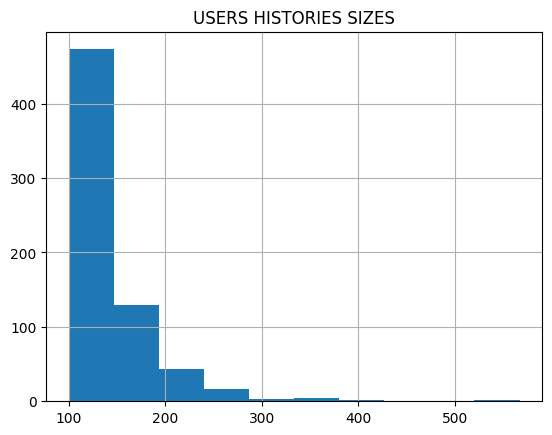

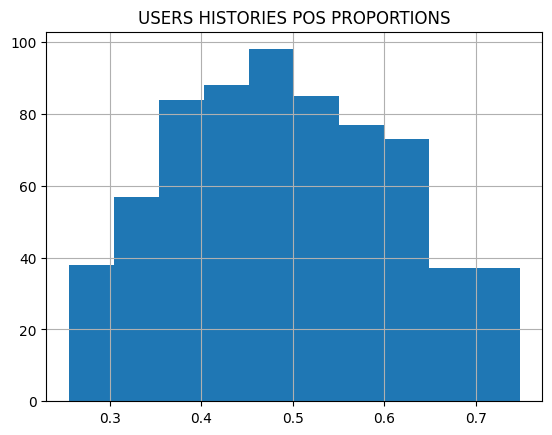

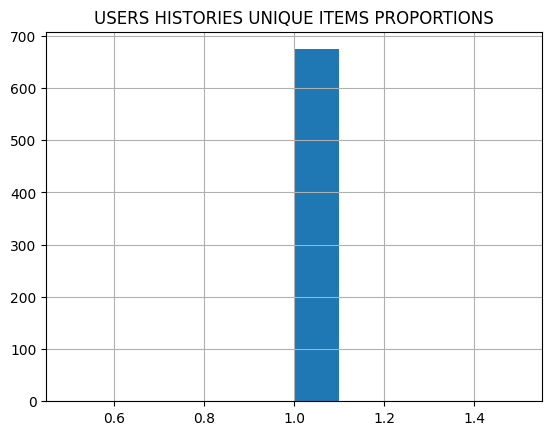

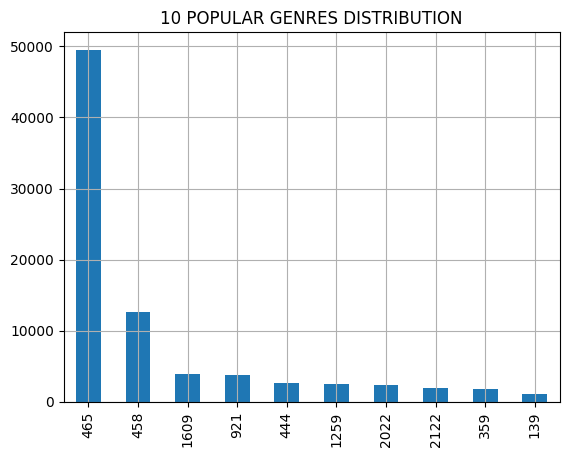

In [6]:
plot_histories_stats(
    data_val, user_id_col=opt.dataset.user_id_col, item_id_col=opt.dataset.item_id_col,
    result_cols=result_cols+["genre_ids"], target_col=opt.dataset.target_col,
    k=100, min_prop=MIN_PROP, max_prop=MAX_PROP, prepare=True,
)

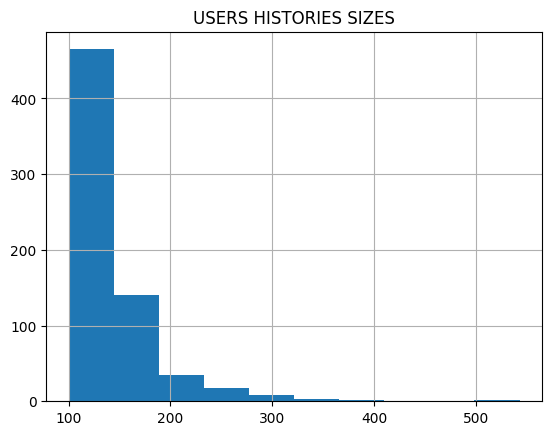

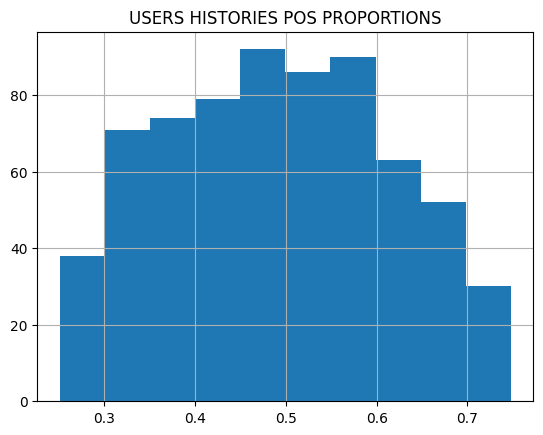

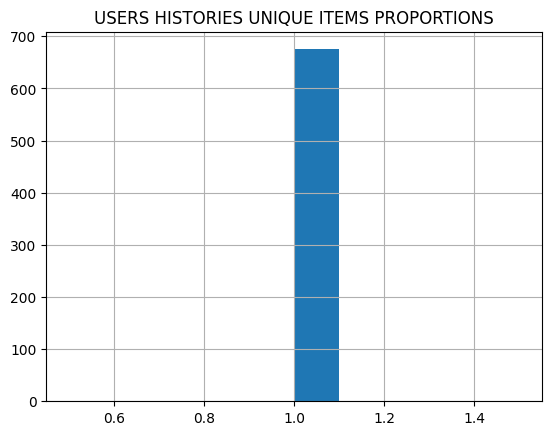

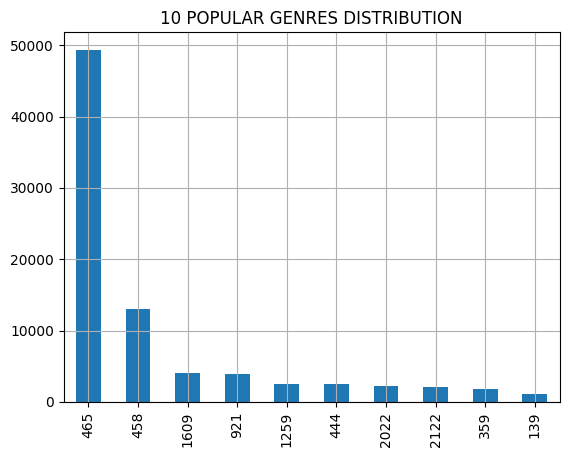

In [7]:
plot_histories_stats(
    data_test, user_id_col=opt.dataset.user_id_col, item_id_col=opt.dataset.item_id_col,
    result_cols=result_cols+["genre_ids"], target_col=opt.dataset.target_col,
    k=100, min_prop=MIN_PROP, max_prop=MAX_PROP, prepare=True,
)

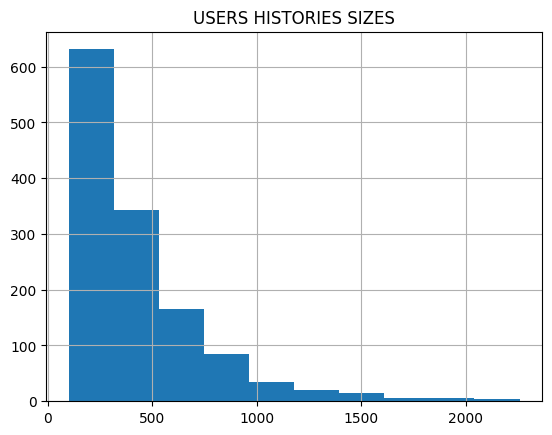

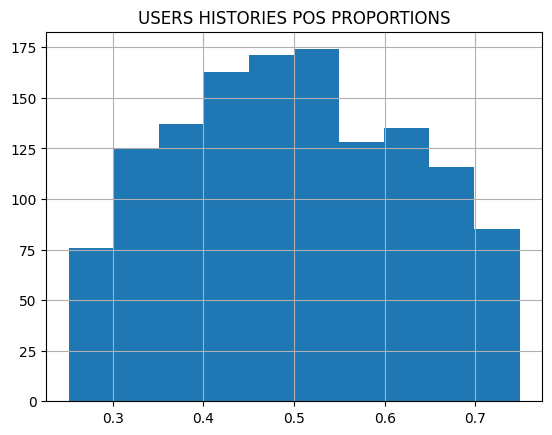

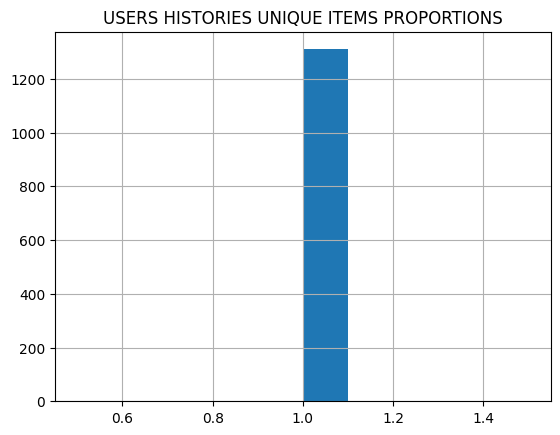

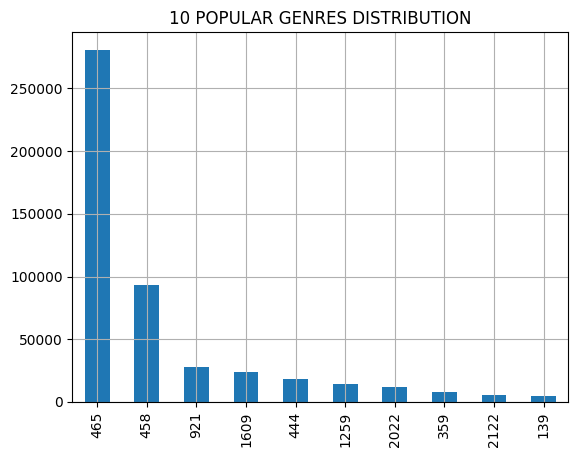

In [8]:
plot_histories_stats(
    cold_users_data, user_id_col=opt.dataset.user_id_col, item_id_col=opt.dataset.item_id_col,
    result_cols=result_cols+["genre_ids"], target_col=opt.dataset.target_col,
    k=100, min_prop=MIN_PROP, max_prop=MAX_PROP, prepare=True,
)

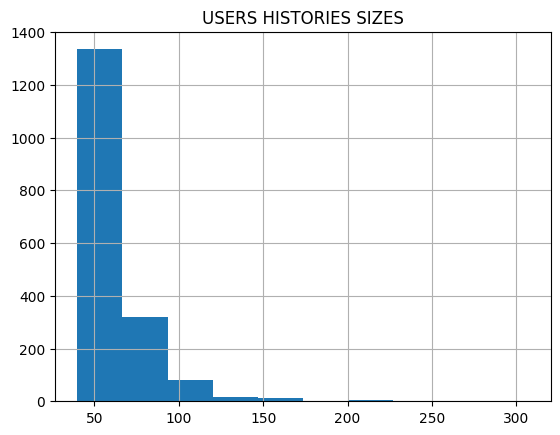

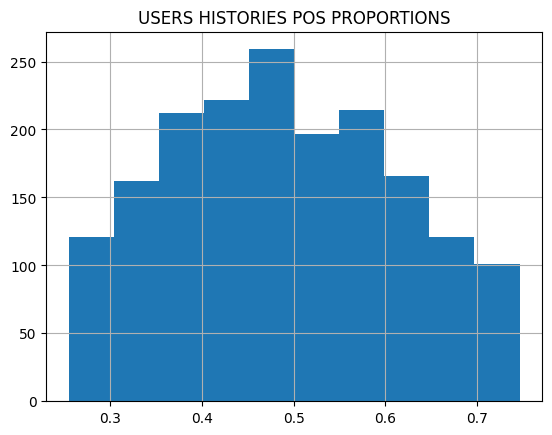

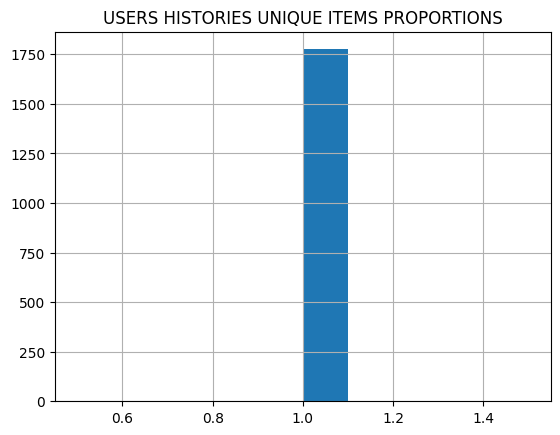

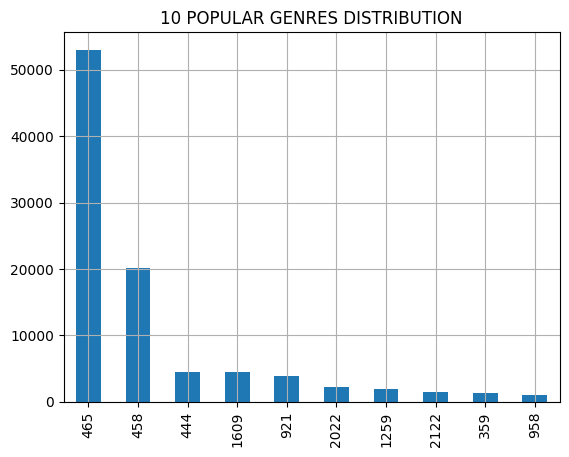

In [9]:
plot_histories_stats(
    cold_items_data, user_id_col=opt.dataset.user_id_col, item_id_col=opt.dataset.item_id_col,
    result_cols=result_cols+["genre_ids"], target_col=opt.dataset.target_col,
    k=40, min_prop=MIN_PROP, max_prop=MAX_PROP, prepare=True,
)

The stats and hists look similar, and we have unique items in histories.

### Random algorithm evaluation (do not use such a ranker in your tasks :)


In [10]:
random_ranker = RandomRanker()

Validation data
----------
Users mean AUC ROC on test: 0.5
Users mean reciprocal rank on test: 0.6848017050539306
Users mean precision@5 on test: 0.4940652818991098


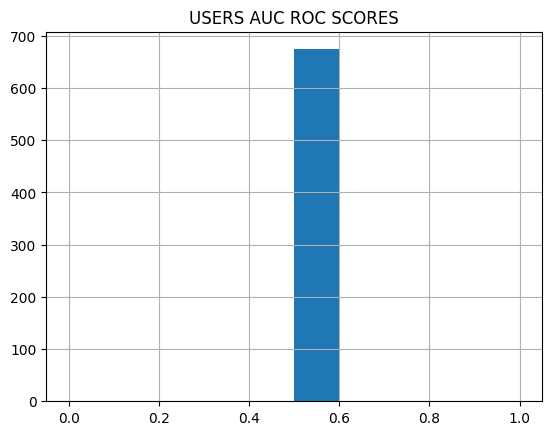

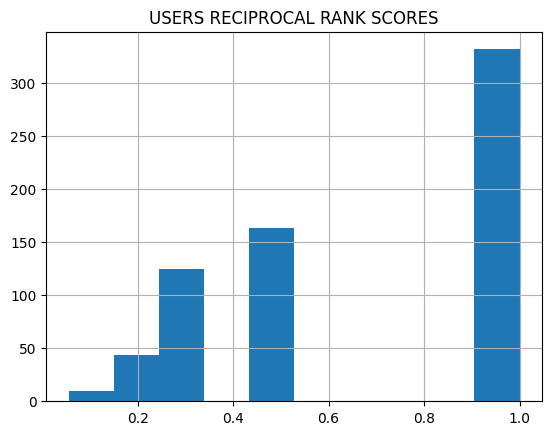

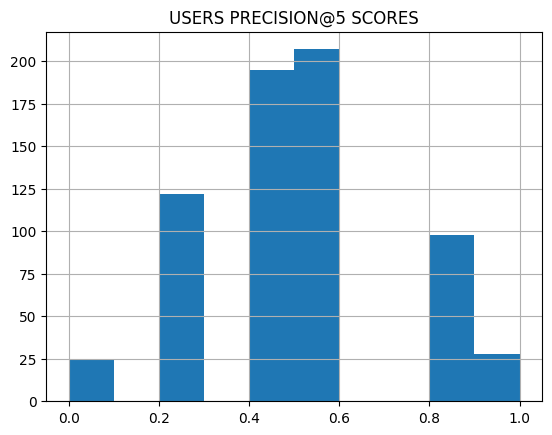

In [12]:
#####
K = 100 #minimum size of user's history
#####
print("Validation data")
print("----------")

val_real_pred = model_evaluation(
    random_ranker, data_val,
    result_cols=result_cols,
    user_id_col=opt.dataset.user_id_col,
    target_col=opt.dataset.target_col,
    score_col=opt.dataset.score_col,
    n=K,
    min_prop=MIN_PROP, max_prop=MAX_PROP
)

In [13]:
val_real_pred.head()

,msno,song_id,target,score
0,BGo4Oilb0i8FCeZOLUPIFGkW3RWDwNuMoixfq+Mmekk=,6DacXyIfstje6EynOjN4eLKbp95UWPZ0N+8EctMV5bw=,0,0
1,y+rCSbVwnDOFjVwVE2s0m6oMKuTdift2dczOFoCUls8=,DpMV43WD2Ev8pT8uIcVrfw0tqU4r/T7RQuBhgelYefA=,0,0
2,nIbXtHhahnJnRyA8FjlOQDlCJ9HGVCds8PGG9oMsf6I=,t+IofZpz3Fa/kh9rA1huUtyeJITnrToaH35PdyQUzcw=,1,0
3,YMK9IDA6yFUBJxwm1SxYNM6nFrMcDAXunV/8dzGFdlo=,D1tFsBLd9VWbonfb6Vek0BI2EJB6udLOuV/x+ptYpOI=,0,0
4,w4SNbHDAMuMbulkgcHGYOl/datijVua3CR5D73DylLs=,7vGvrf5l1XzNbeLZXzQgaNvc2VBmncarpN3LQpLUZiY=,1,0


Train data
----------
Users mean AUC ROC on test: 0.5
Users mean reciprocal rank on test: 0.6848017050539306
Users mean precision@5 on test: 0.4940652818991098


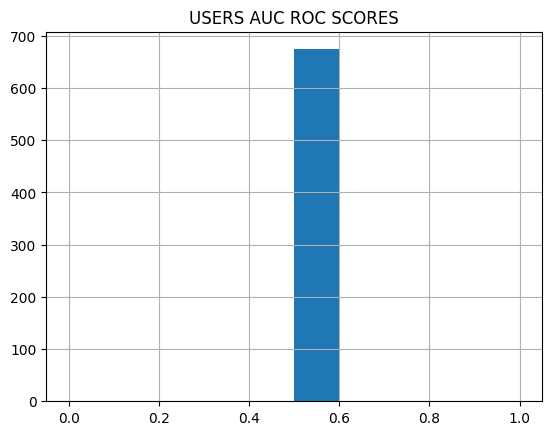

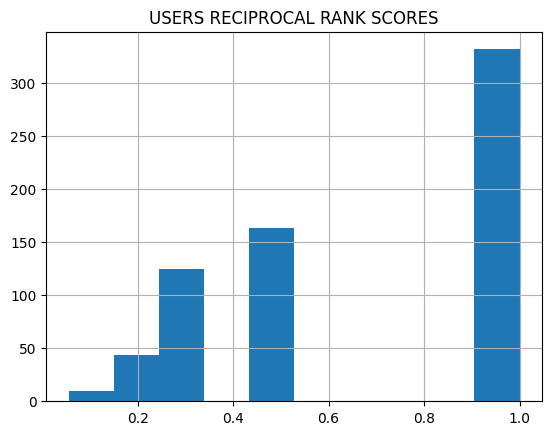

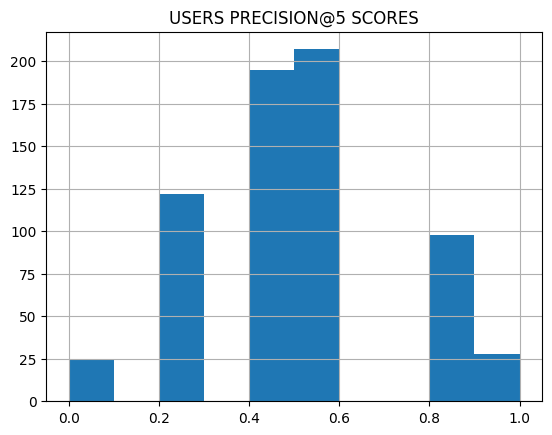

In [14]:
#####
K = 100 #minimum size of user's history
#####
print("Train data")
print("----------")
_ = model_evaluation(
    random_ranker, data_val,
    result_cols=result_cols,
    user_id_col=opt.dataset.user_id_col,
    target_col=opt.dataset.target_col,
    score_col=opt.dataset.score_col,
    n=K,
    min_prop=MIN_PROP, max_prop=MAX_PROP
)

Test data
----------
Users mean AUC ROC on test: 0.5
Users mean reciprocal rank on test: 0.6807817298577532
Users mean precision@5 on test: 0.4921481481481482


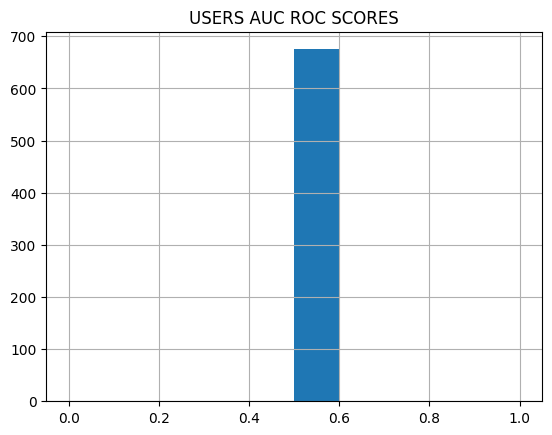

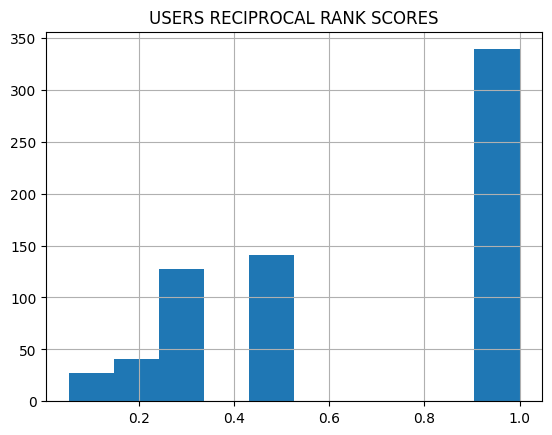

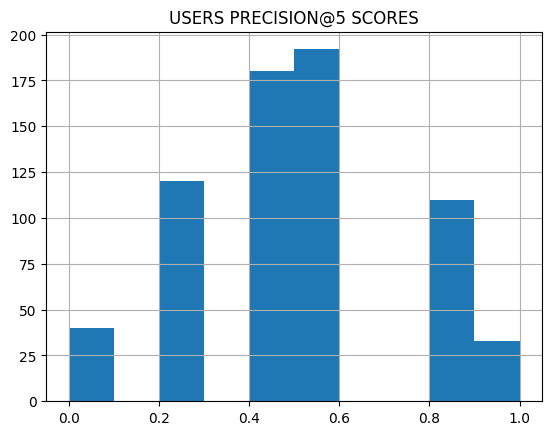

In [15]:
#####
K = 100 #minimum size of user's history
#####
print("Test data")
print("----------")
_ = model_evaluation(
    random_ranker, data_test,
    result_cols=result_cols,
    user_id_col=opt.dataset.user_id_col,
    target_col=opt.dataset.target_col,
    score_col=opt.dataset.score_col,
    n=K,
    min_prop=MIN_PROP, max_prop=MAX_PROP
)

Cold users data
----------
Users mean AUC ROC on test: 0.5
Users mean reciprocal rank on test: 0.6777837920075235
Users mean precision@5 on test: 0.49786259541984734


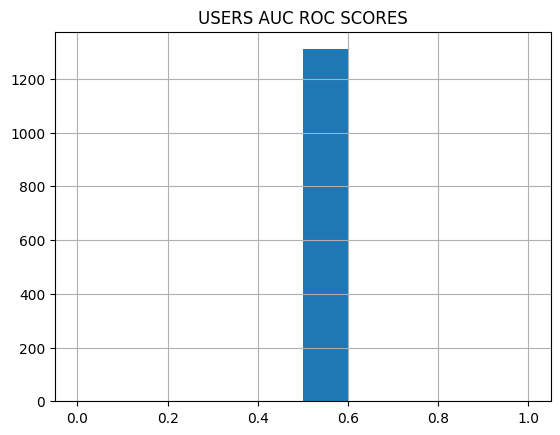

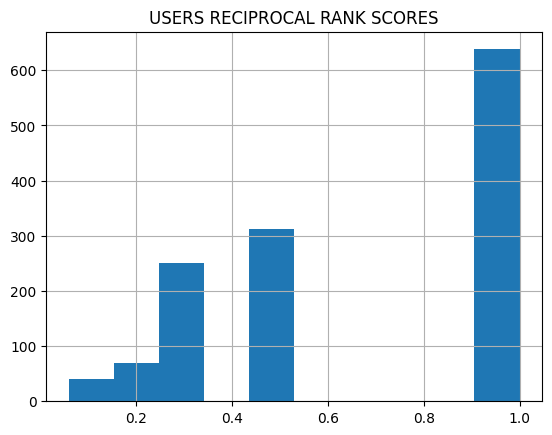

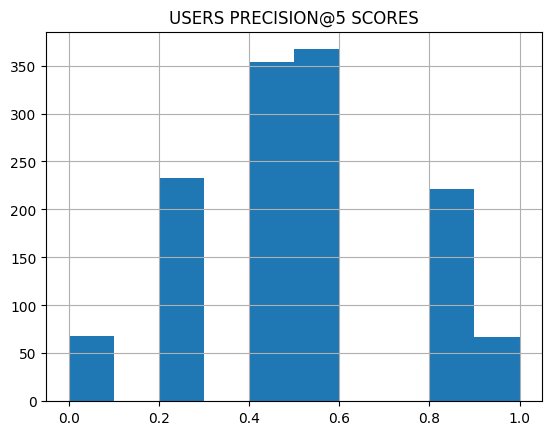

In [16]:
#####
K = 100 #minimum size of user's history
#####
print("Cold users data")
print("----------")
_ = model_evaluation(
    random_ranker, cold_users_data,
    result_cols=result_cols,
    user_id_col=opt.dataset.user_id_col,
    target_col=opt.dataset.target_col,
    score_col=opt.dataset.score_col,
    n=K,
    min_prop=MIN_PROP, max_prop=MAX_PROP
)

Cold items data
----------
Users mean AUC ROC on test: 0.5
Users mean reciprocal rank on test: 0.672866971838803
Users mean precision@5 on test: 0.48732394366197185


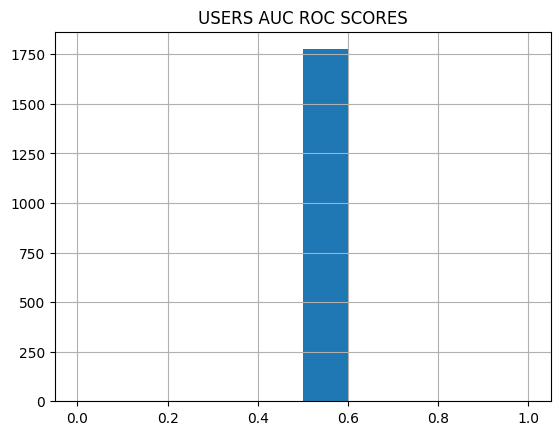

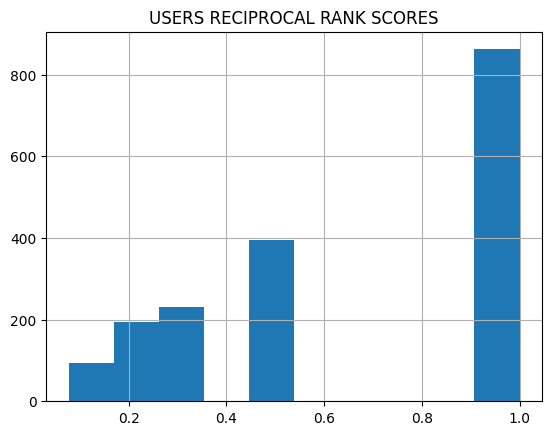

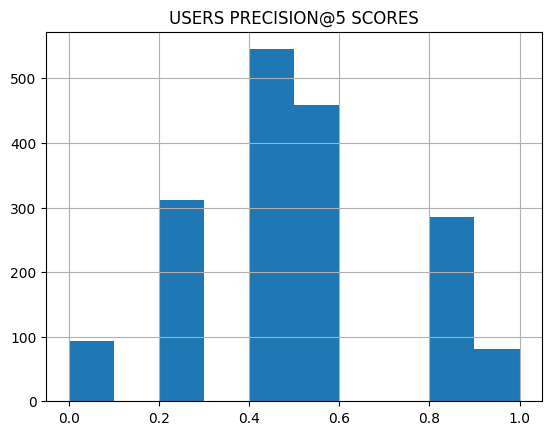

In [17]:
#####
K = 40 #minimum size of user's history
#####
print("Cold items data")
print("----------")
_ = model_evaluation(
    random_ranker, cold_items_data,
    result_cols=result_cols,
    user_id_col=opt.dataset.user_id_col,
    target_col=opt.dataset.target_col,
    score_col=opt.dataset.score_col,
    n=K,
    min_prop=MIN_PROP, max_prop=MAX_PROP
)

### We can see that users' auc roc scores are 0.5 and precision scores are normally distributed in all the cases.

### Baseline ranker evaluation

In [18]:
ranker = PopularRanker(column_to_agg=opt.dataset.item_id_col)
ranker.fit(data_train_pos)

PopularRanker(column_to_agg='song_id')

Validation data
----------
Users mean AUC ROC on test: 0.5
Users mean reciprocal rank on test: 0.6848017050539306
Users mean precision@5 on test: 0.4940652818991098


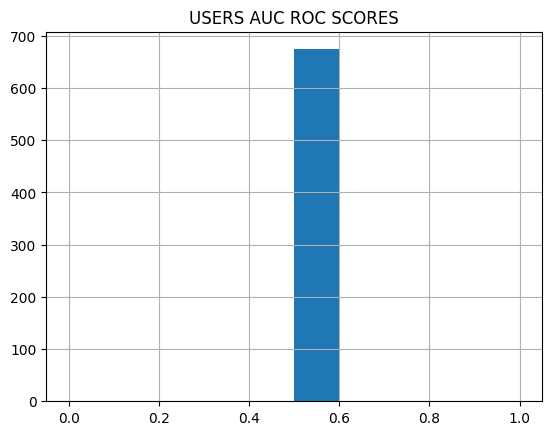

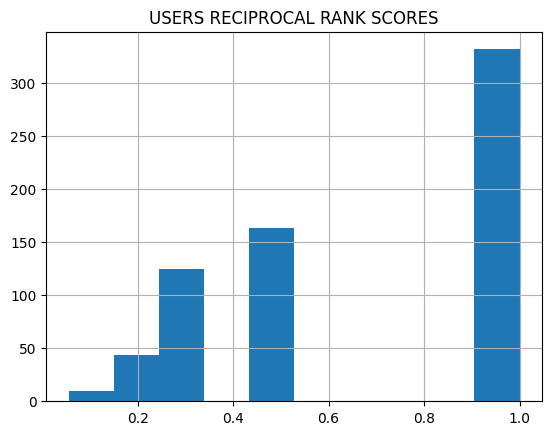

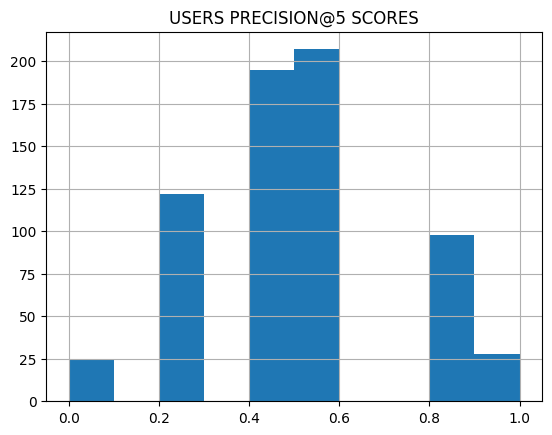

In [19]:
#####
K = 100 #minimum size of user's history
#####
print("Validation data")
print("----------")
val_real_pred = model_evaluation(
    random_ranker, data_val,
    result_cols=result_cols,
    user_id_col=opt.dataset.user_id_col,
    target_col=opt.dataset.target_col,
    score_col=opt.dataset.score_col,
    n=K,
    min_prop=MIN_PROP, max_prop=MAX_PROP
)

In [20]:
val_real_pred.head()

,msno,song_id,target,score
0,BGo4Oilb0i8FCeZOLUPIFGkW3RWDwNuMoixfq+Mmekk=,6DacXyIfstje6EynOjN4eLKbp95UWPZ0N+8EctMV5bw=,0,0
1,y+rCSbVwnDOFjVwVE2s0m6oMKuTdift2dczOFoCUls8=,DpMV43WD2Ev8pT8uIcVrfw0tqU4r/T7RQuBhgelYefA=,0,0
2,nIbXtHhahnJnRyA8FjlOQDlCJ9HGVCds8PGG9oMsf6I=,t+IofZpz3Fa/kh9rA1huUtyeJITnrToaH35PdyQUzcw=,1,0
3,YMK9IDA6yFUBJxwm1SxYNM6nFrMcDAXunV/8dzGFdlo=,D1tFsBLd9VWbonfb6Vek0BI2EJB6udLOuV/x+ptYpOI=,0,0
4,w4SNbHDAMuMbulkgcHGYOl/datijVua3CR5D73DylLs=,7vGvrf5l1XzNbeLZXzQgaNvc2VBmncarpN3LQpLUZiY=,1,0


Train data
----------
Users mean AUC ROC on test: 0.5
Users mean reciprocal rank on test: 0.6846962285171566
Users mean precision@5 on test: 0.496351575456053


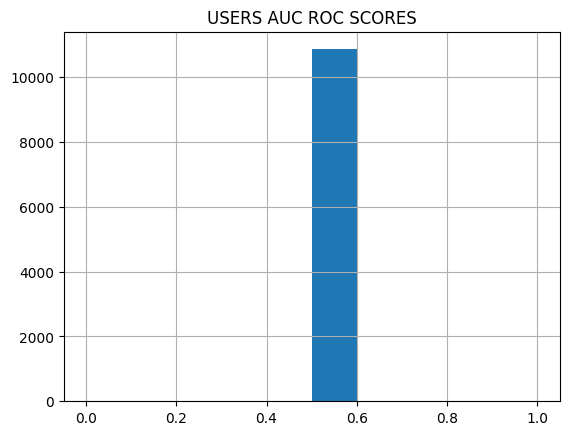

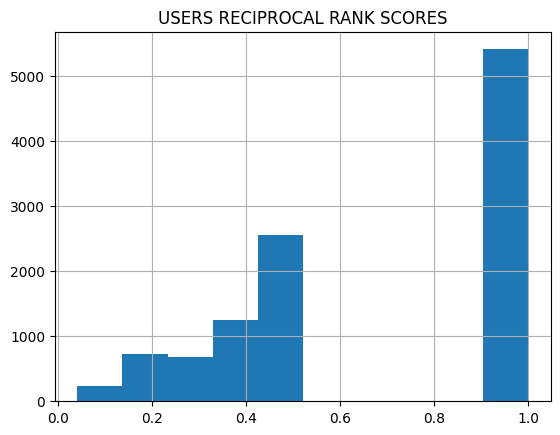

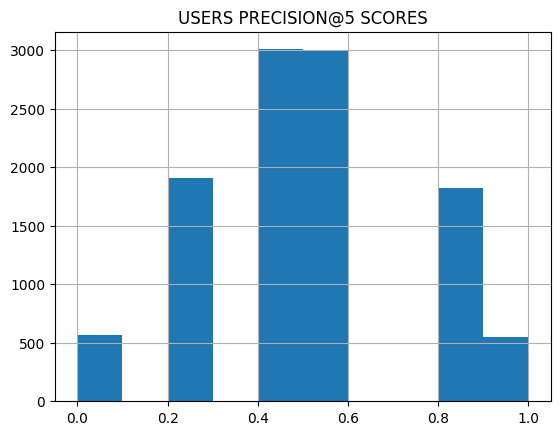

In [21]:
#####
K = 100 #minimum size of user's history
#####
print("Train data")
print("----------")
_ = model_evaluation(
    random_ranker, data_train_all,
    result_cols=result_cols,
    user_id_col=opt.dataset.user_id_col,
    target_col=opt.dataset.target_col,
    score_col=opt.dataset.score_col,
    n=K,
    min_prop=MIN_PROP, max_prop=MAX_PROP
)

Test data
----------
Users mean AUC ROC on test: 0.5
Users mean reciprocal rank on test: 0.6807817298577532
Users mean precision@5 on test: 0.4921481481481482


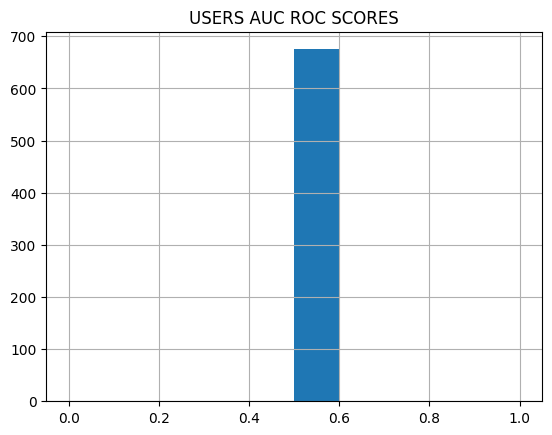

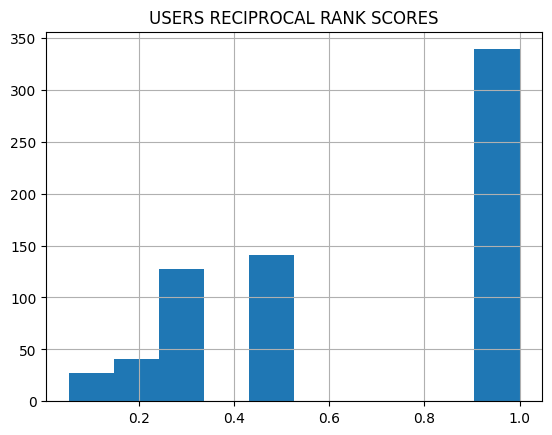

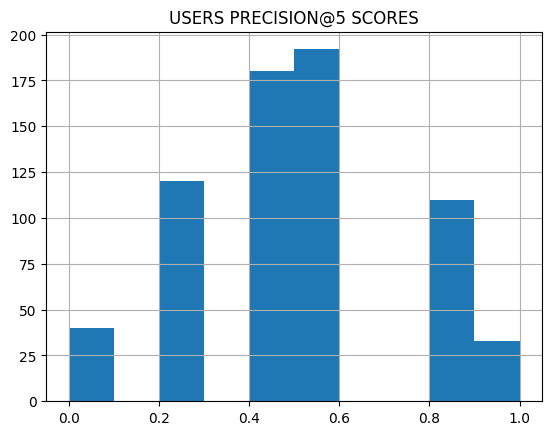

In [22]:
#####
K = 100 #minimum size of user's history
#####
print("Test data")
print("----------")
_ = model_evaluation(
    random_ranker, data_test,
    result_cols=result_cols,
    user_id_col=opt.dataset.user_id_col,
    target_col=opt.dataset.target_col,
    score_col=opt.dataset.score_col,
    n=K,
    min_prop=MIN_PROP, max_prop=MAX_PROP
)

Cold users data
----------
Users mean AUC ROC on test: 0.5
Users mean reciprocal rank on test: 0.6777837920075235
Users mean precision@5 on test: 0.49786259541984734


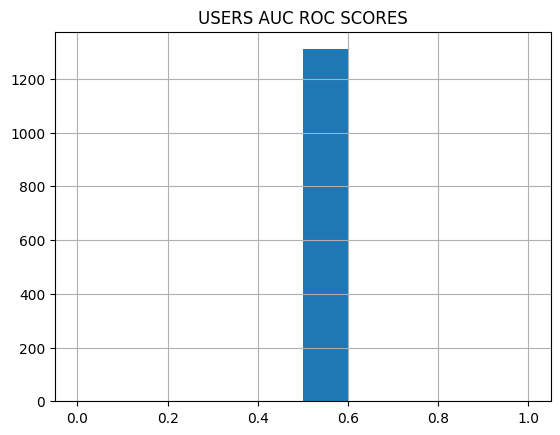

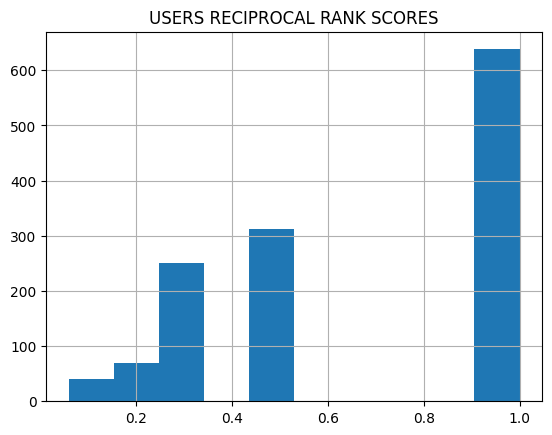

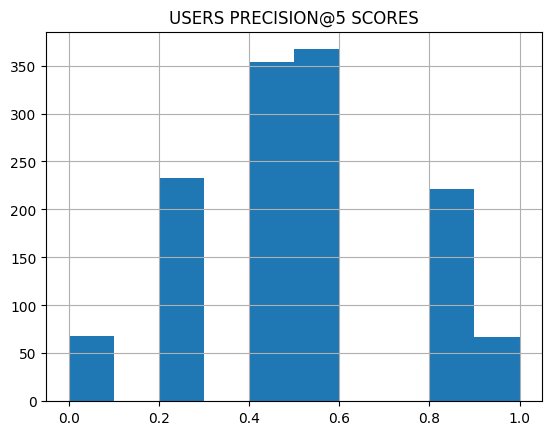

In [23]:
#####
K = 100 #minimum size of user's history
#####
print("Cold users data")
print("----------")
_ = model_evaluation(
    random_ranker, cold_users_data,
    result_cols=result_cols,
    user_id_col=opt.dataset.user_id_col,
    target_col=opt.dataset.target_col,
    score_col=opt.dataset.score_col,
    n=K,
    min_prop=MIN_PROP, max_prop=MAX_PROP
)

Cold items data
----------
Users mean AUC ROC on test: 0.5
Users mean reciprocal rank on test: 0.672866971838803
Users mean precision@5 on test: 0.48732394366197185


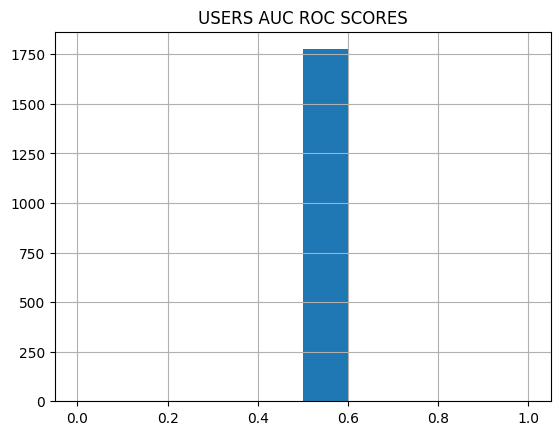

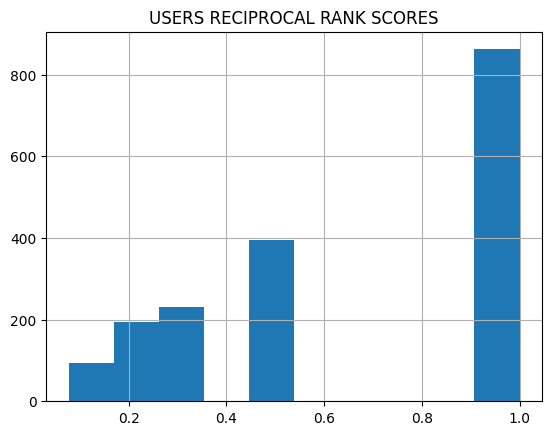

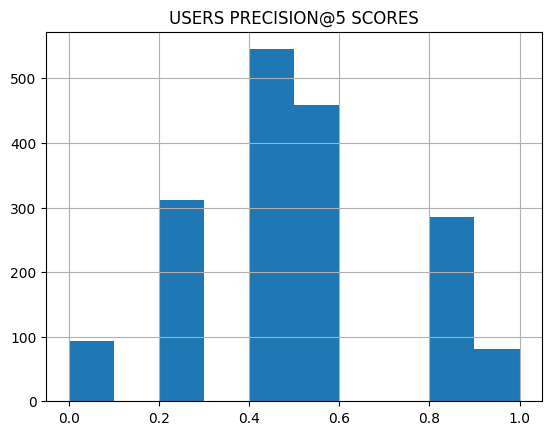

In [24]:
#####
K = 40 #minimum size of user's history
#####
print("Cold items data")
print("----------")
_ = model_evaluation(
    random_ranker, cold_items_data,
    result_cols=result_cols,
    user_id_col=opt.dataset.user_id_col,
    target_col=opt.dataset.target_col,
    score_col=opt.dataset.score_col,
    n=K,
    min_prop=MIN_PROP, max_prop=MAX_PROP
)

### Here we can see better results  in all the cases but the last one - we don't have any info for cold items. This is our baseline solution. But can we do better? :)